In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/StudentsPerformance.csv')

In [3]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


#1. Find out how many males and females participated in the test.##

In [5]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

#2. What do you think about the students parental level of education? ##

In [6]:
parental_education = data['parental level of education'].value_counts()
parental_education

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Plot a bar chart for parental education
mean_scores_by_education = data.groupby('parental level of education').mean()

<ipython-input-8-98dd1a4be509>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_scores_by_education = data.groupby('parental level of education').mean()


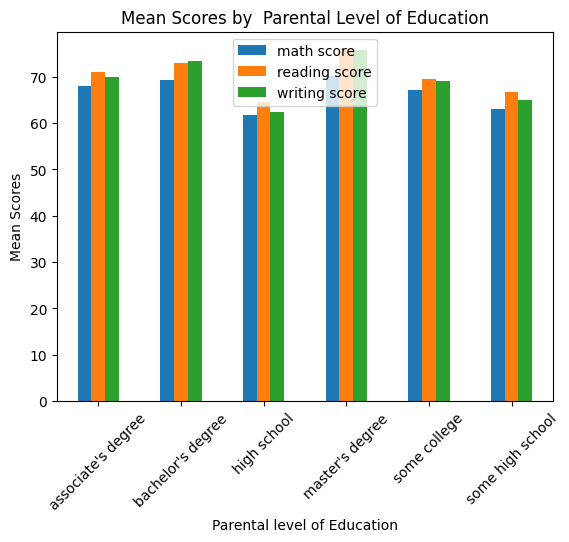

In [9]:
mean_scores_by_education[['math score', 'reading score', 'writing score']].plot(kind='bar')
plt.title('Mean Scores by  Parental Level of Education')
plt.xlabel('Parental level of Education')
plt.ylabel('Mean Scores')
plt.xticks(rotation=45)
plt.show()

#3. Who scores the most on average for math, reading and writing based on
##● Gender


In [10]:
average_scores = data.groupby(['gender'])[['math score', 'reading score','writing score']].mean()
average_scores.head(1)

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181


## ● Test preparation course

In [11]:
average_test_preparations = data.groupby(['test preparation course'])[['math score', 'reading score','writing score']].mean()
average_test_preparations.head(1)

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358



#4. What do you think about the scoring variation for math, reading and writing based on
##● Gender


In [12]:
data.groupby(['gender'])[['math score','reading score','writing score']].std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [13]:
data.groupby(['gender'])[['math score','reading score','writing score']].var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


## ● Test preparation





In [14]:
data.groupby(['test preparation course'])[['math score','reading score','writing score']].std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


In [15]:
data.groupby(['test preparation course'])[['math score','reading score','writing score']].var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


#5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [16]:
data_sorted = data.sort_values(by='math score', ascending=False)
top_25percent = int(0.25* len(data_sorted))

In [17]:
data_sorted['bonus points'] = 0
data_sorted.iloc[:top_25percent, -1] =10
data_sorted

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,bonus points
999,male,group E,bachelor's degree,standard,completed,100,100,100,10
996,male,group A,some college,standard,completed,100,96,86,10
515,female,group E,some college,standard,none,100,92,97,10
517,female,group E,associate's degree,standard,none,100,100,100,10
516,female,group E,bachelor's degree,standard,none,100,100,100,10
...,...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28,0
51,female,group C,some high school,free/reduced,none,13,41,51,0
3,female,group B,some college,standard,none,11,38,32,0
1,female,group B,high school,free/reduced,none,8,24,23,0
